# Slide 24: Descriptive Statistics - Class Report Card
## Simple Explanation + Real-World Example

Different ways to describe the "middle" and "spread" of your data - like getting a report card for your dataset!

## Setup and Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better looking plots
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("📊 Descriptive Statistics Made Simple!")
print("=" * 45)

📊 Descriptive Statistics Made Simple!


---
## 📝 Simple Explanation: Class Test Scores

Imagine you're a teacher and just graded a math test. How do you describe how the class did overall?

📚 MR. SMITH'S MATH CLASS - TEST RESULTS
Here are the test scores from our recent math exam:
  Alice: 72
  Bob: 75
  Carol: 78
  David: 80
  Emma: 80
  Frank: 82
  Grace: 85
  Henry: 85
  Ivy: 85
  Jack: 88
  Kim: 90
  Leo: 100

Now, how do we describe how the class did overall?
We have THREE main ways to find the 'middle':

🤔 What if Leo got 100 instead of a more normal score?


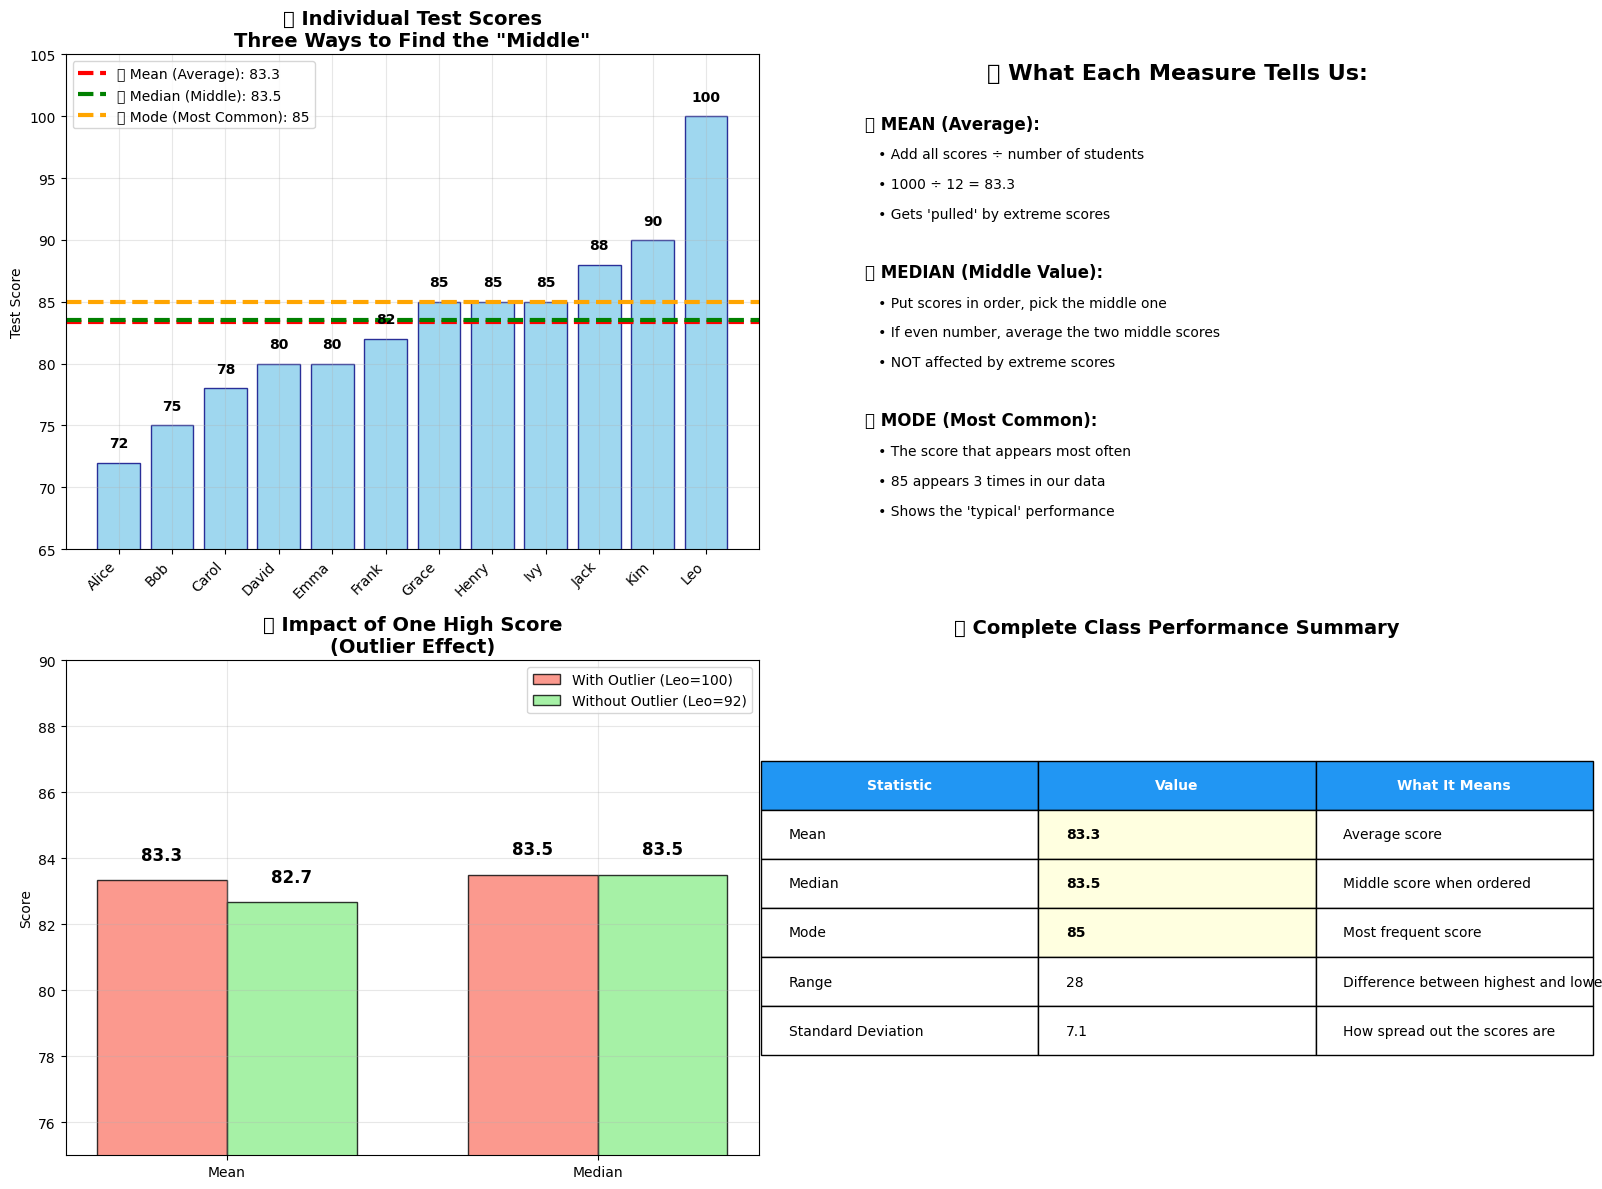


📊 Key Insights:
• Mean (83.3) is pulled up by Leo's perfect score
• Median (83.5) represents the 'typical' student better
• Mode (85) shows that 85 was the most common score
• When you have outliers, median is often more meaningful than mean!


In [2]:
def class_test_example():
    """Simple explanation using class test scores"""
    
    # Our class test scores
    test_scores = [72, 75, 78, 80, 80, 82, 85, 85, 85, 88, 90, 100]
    student_names = ['Alice', 'Bob', 'Carol', 'David', 'Emma', 'Frank', 
                    'Grace', 'Henry', 'Ivy', 'Jack', 'Kim', 'Leo']
    
    print("📚 MR. SMITH'S MATH CLASS - TEST RESULTS")
    print("=" * 45)
    print("Here are the test scores from our recent math exam:")
    
    for name, score in zip(student_names, test_scores):
        print(f"  {name}: {score}")
    
    print(f"\nNow, how do we describe how the class did overall?")
    print(f"We have THREE main ways to find the 'middle':")
    
    # Calculate the three measures of central tendency
    mean_score = np.mean(test_scores)
    median_score = np.median(test_scores)
    mode_result = stats.mode(test_scores, keepdims=True)
    mode_score = mode_result[0][0]
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # Individual student scores with the three measures
    bars = ax1.bar(range(len(test_scores)), test_scores, 
                   color='skyblue', alpha=0.8, edgecolor='navy', linewidth=1)
    
    # Add the three measures as horizontal lines
    ax1.axhline(mean_score, color='red', linestyle='--', linewidth=3, 
               label=f'🔴 Mean (Average): {mean_score:.1f}')
    ax1.axhline(median_score, color='green', linestyle='--', linewidth=3, 
               label=f'🟢 Median (Middle): {median_score:.1f}')
    ax1.axhline(mode_score, color='orange', linestyle='--', linewidth=3, 
               label=f'🟠 Mode (Most Common): {mode_score:.0f}')
    
    ax1.set_xticks(range(len(student_names)))
    ax1.set_xticklabels(student_names, rotation=45, ha='right')
    ax1.set_ylabel('Test Score')
    ax1.set_title('📝 Individual Test Scores\nThree Ways to Find the "Middle"', 
                 fontsize=14, weight='bold')
    ax1.legend(loc='upper left')
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim(65, 105)
    
    # Add score labels on bars
    for bar, score in zip(bars, test_scores):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                f'{score}', ha='center', va='bottom', fontsize=10, weight='bold')
    
    # Explanation of each measure
    ax2.axis('off')
    ax2.text(0.5, 0.95, "📚 What Each Measure Tells Us:", 
             ha='center', fontsize=16, weight='bold')
    
    explanations = [
        "🔴 MEAN (Average):",
        "   • Add all scores ÷ number of students",
        f"   • {sum(test_scores)} ÷ {len(test_scores)} = {mean_score:.1f}",
        "   • Gets 'pulled' by extreme scores",
        "",
        "🟢 MEDIAN (Middle Value):",
        "   • Put scores in order, pick the middle one",
        "   • If even number, average the two middle scores",
        "   • NOT affected by extreme scores",
        "",
        "🟠 MODE (Most Common):",
        "   • The score that appears most often",
        f"   • {mode_score} appears 3 times in our data",
        "   • Shows the 'typical' performance"
    ]
    
    for i, text in enumerate(explanations):
        weight = 'bold' if text.startswith(('🔴', '🟢', '🟠')) else 'normal'
        fontsize = 12 if text.startswith(('🔴', '🟢', '🟠')) else 10
        ax2.text(0.05, 0.85 - i*0.06, text, fontsize=fontsize, weight=weight)
    
    # Show what happens with an outlier
    print(f"\n🤔 What if Leo got 100 instead of a more normal score?")
    
    # Compare with and without outlier
    normal_scores = test_scores[:-1] + [92]  # Replace Leo's 100 with 92
    
    comparison_data = {
        'With Leo\'s 100': [np.mean(test_scores), np.median(test_scores)],
        'If Leo Got 92': [np.mean(normal_scores), np.median(normal_scores)]
    }
    
    x = np.arange(2)
    width = 0.35
    
    bars1 = ax3.bar(x - width/2, comparison_data['With Leo\'s 100'], width, 
                   label='With Outlier (Leo=100)', alpha=0.8, color='salmon', edgecolor='black')
    bars2 = ax3.bar(x + width/2, comparison_data['If Leo Got 92'], width, 
                   label='Without Outlier (Leo=92)', alpha=0.8, color='lightgreen', edgecolor='black')
    
    ax3.set_ylabel('Score')
    ax3.set_title('🎯 Impact of One High Score\n(Outlier Effect)', fontsize=14, weight='bold')
    ax3.set_xticks(x)
    ax3.set_xticklabels(['Mean', 'Median'])
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    ax3.set_ylim(75, 90)
    
    # Add value labels
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax3.text(bar.get_x() + bar.get_width()/2, height + 0.5,
                    f'{height:.1f}', ha='center', va='bottom', fontsize=12, weight='bold')
    
    # Summary statistics table
    stats_summary = pd.DataFrame({
        'Statistic': ['Mean', 'Median', 'Mode', 'Range', 'Standard Deviation'],
        'Value': [f'{mean_score:.1f}', f'{median_score:.1f}', f'{mode_score:.0f}',
                 f'{max(test_scores) - min(test_scores)}', f'{np.std(test_scores):.1f}'],
        'What It Means': ['Average score', 'Middle score when ordered', 'Most frequent score',
                         'Difference between highest and lowest', 'How spread out the scores are']
    })
    
    ax4.axis('tight')
    ax4.axis('off')
    table = ax4.table(cellText=stats_summary.values, 
                     colLabels=stats_summary.columns,
                     cellLoc='left', 
                     loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 2.5)
    
    # Color the header
    for i in range(len(stats_summary.columns)):
        table[(0, i)].set_facecolor('#2196F3')
        table[(0, i)].set_text_props(weight='bold', color='white')
    
    # Highlight the central tendency measures
    for i in range(1, 4):  # Mean, Median, Mode rows
        table[(i, 1)].set_facecolor('lightyellow')
        table[(i, 1)].set_text_props(weight='bold')
    
    ax4.set_title('📊 Complete Class Performance Summary', fontsize=14, weight='bold', pad=20)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n📊 Key Insights:")
    print(f"• Mean ({mean_score:.1f}) is pulled up by Leo's perfect score")
    print(f"• Median ({median_score:.1f}) represents the 'typical' student better")
    print(f"• Mode ({mode_score}) shows that {mode_score} was the most common score")
    print(f"• When you have outliers, median is often more meaningful than mean!")

class_test_example()

---
## 🛒 Real-World Example: E-commerce Customer Spending

Now let's see how descriptive statistics work in a real business situation!

🛒 BUSINESS SCENARIO: Online Store Customer Analysis
You run an online store and want to understand your customers' spending patterns.
You have data from 1,000 customers over the past month.



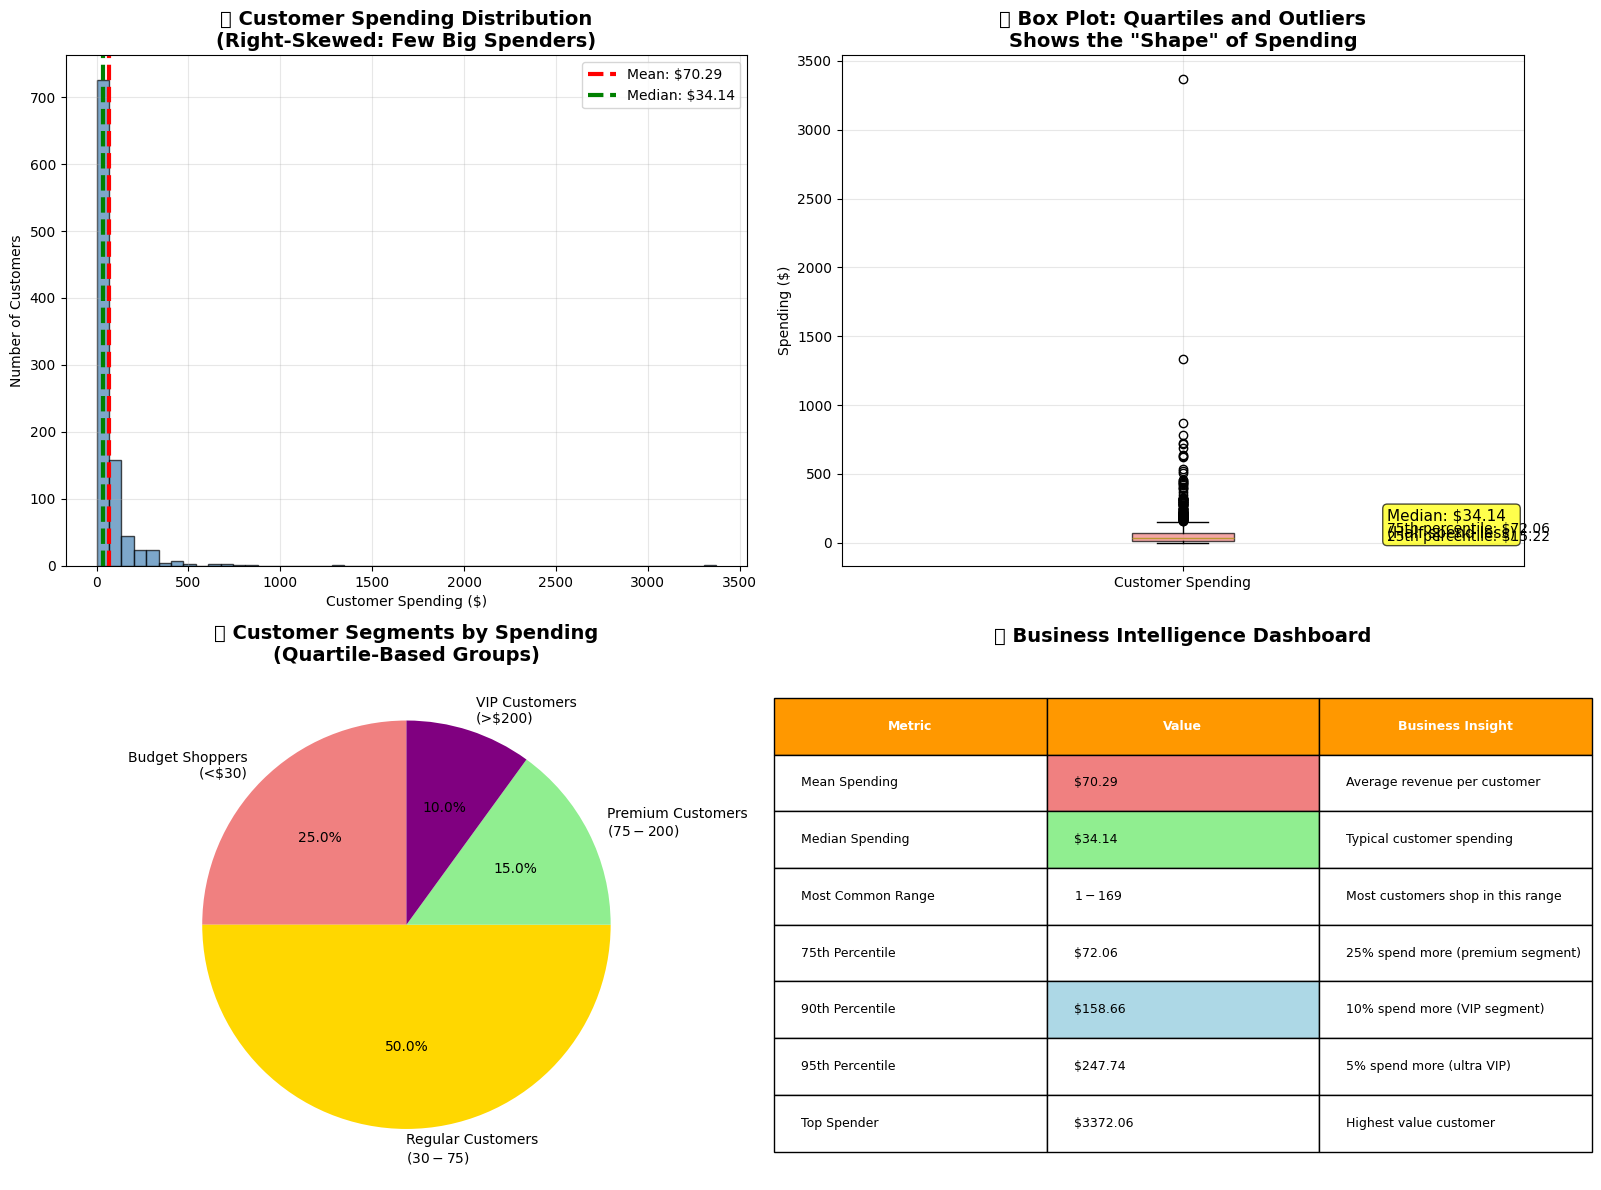

💡 KEY BUSINESS INSIGHTS:
📊 Mean ($70.29) > Median ($34.14) → Right-skewed data
   This means most customers spend less than average!

🎯 Strategic Recommendations:
   • Target marketing budget on VIP customers (100 people = top 10%)
   • Use $34 (median) for 'typical customer' in presentations
   • Create premium products for the $159+ spenders
   • Don't ignore budget shoppers - they're 25% of customers!


In [3]:
def ecommerce_analysis():
    """Real business example: Customer spending patterns"""
    
    print("🛒 BUSINESS SCENARIO: Online Store Customer Analysis")
    print("=" * 60)
    print("You run an online store and want to understand your customers' spending patterns.")
    print("You have data from 1,000 customers over the past month.\n")
    
    # Generate realistic customer spending data (right-skewed like real e-commerce)
    np.random.seed(42)
    n_customers = 1000
    
    # Most customers spend little, few spend a lot (log-normal distribution)
    spending = np.random.lognormal(mean=3.5, sigma=1.2, size=n_customers)
    spending = np.round(spending, 2)
    
    # Calculate comprehensive statistics
    mean_spend = np.mean(spending)
    median_spend = np.median(spending)
    mode_result = stats.mode(spending, keepdims=True)
    
    # For continuous data, mode isn't very meaningful, so let's find the most common range
    hist, bin_edges = np.histogram(spending, bins=20)
    mode_bin_idx = np.argmax(hist)
    mode_range = f"${bin_edges[mode_bin_idx]:.0f}-${bin_edges[mode_bin_idx+1]:.0f}"
    
    # Additional statistics for business insights
    q25 = np.percentile(spending, 25)
    q75 = np.percentile(spending, 75)
    q90 = np.percentile(spending, 90)
    q95 = np.percentile(spending, 95)
    max_spend = np.max(spending)
    std_spend = np.std(spending)
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # Distribution histogram
    ax1.hist(spending, bins=50, alpha=0.7, color='steelblue', edgecolor='black')
    ax1.axvline(mean_spend, color='red', linestyle='--', linewidth=3, 
               label=f'Mean: ${mean_spend:.2f}')
    ax1.axvline(median_spend, color='green', linestyle='--', linewidth=3, 
               label=f'Median: ${median_spend:.2f}')
    ax1.set_xlabel('Customer Spending ($)')
    ax1.set_ylabel('Number of Customers')
    ax1.set_title('🛒 Customer Spending Distribution\n(Right-Skewed: Few Big Spenders)', 
                 fontsize=14, weight='bold')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Box plot to show quartiles and outliers
    box_data = ax2.boxplot(spending, vert=True, patch_artist=True, 
                          labels=['Customer Spending'])
    box_data['boxes'][0].set_facecolor('lightcoral')
    box_data['boxes'][0].set_alpha(0.7)
    
    ax2.set_ylabel('Spending ($)')
    ax2.set_title('📦 Box Plot: Quartiles and Outliers\nShows the "Shape" of Spending', 
                 fontsize=14, weight='bold')
    ax2.grid(True, alpha=0.3)
    
    # Add annotations to explain box plot
    ax2.text(1.3, median_spend, f'Median: ${median_spend:.2f}\n(Half spend less)', 
            fontsize=11, bbox=dict(boxstyle="round", facecolor="yellow", alpha=0.7))
    ax2.text(1.3, q75, f'75th percentile: ${q75:.2f}', fontsize=10)
    ax2.text(1.3, q25, f'25th percentile: ${q25:.2f}', fontsize=10)
    
    # Customer segmentation based on spending
    segments = {
        'Budget Shoppers\n(<$30)': len(spending[spending < q25]),
        'Regular Customers\n($30-$75)': len(spending[(spending >= q25) & (spending < q75)]),
        'Premium Customers\n($75-$200)': len(spending[(spending >= q75) & (spending < q90)]),
        'VIP Customers\n(>$200)': len(spending[spending >= q90])
    }
    
    colors = ['lightcoral', 'gold', 'lightgreen', 'purple']
    wedges, texts, autotexts = ax3.pie(segments.values(), labels=segments.keys(), 
                                      autopct='%1.1f%%', colors=colors, 
                                      startangle=90)
    ax3.set_title('🎯 Customer Segments by Spending\n(Quartile-Based Groups)', 
                 fontsize=14, weight='bold')
    
    # Business insights table
    insights_data = {
        'Metric': ['Mean Spending', 'Median Spending', 'Most Common Range', 
                  '75th Percentile', '90th Percentile', '95th Percentile', 'Top Spender'],
        'Value': [f'${mean_spend:.2f}', f'${median_spend:.2f}', mode_range,
                 f'${q75:.2f}', f'${q90:.2f}', f'${q95:.2f}', f'${max_spend:.2f}'],
        'Business Insight': [
            'Average revenue per customer',
            'Typical customer spending',
            'Most customers shop in this range',
            '25% spend more (premium segment)',
            '10% spend more (VIP segment)',
            '5% spend more (ultra VIP)',
            'Highest value customer'
        ]
    }
    
    df_insights = pd.DataFrame(insights_data)
    
    ax4.axis('tight')
    ax4.axis('off')
    table = ax4.table(cellText=df_insights.values,
                     colLabels=df_insights.columns,
                     cellLoc='left',
                     loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1.2, 2.8)
    
    # Color the header
    for i in range(len(df_insights.columns)):
        table[(0, i)].set_facecolor('#FF9800')
        table[(0, i)].set_text_props(weight='bold', color='white')
    
    # Highlight key metrics
    table[(1, 1)].set_facecolor('lightcoral')  # Mean
    table[(2, 1)].set_facecolor('lightgreen')  # Median
    table[(5, 1)].set_facecolor('lightblue')   # 90th percentile
    
    ax4.set_title('💼 Business Intelligence Dashboard', 
                 fontsize=14, weight='bold', pad=20)
    
    plt.tight_layout()
    plt.show()
    
    print(f"💡 KEY BUSINESS INSIGHTS:")
    print(f"📊 Mean (${mean_spend:.2f}) > Median (${median_spend:.2f}) → Right-skewed data")
    print(f"   This means most customers spend less than average!")
    print(f"\n🎯 Strategic Recommendations:")
    print(f"   • Target marketing budget on VIP customers ({segments['VIP Customers\n(>$200)']} people = top 10%)")
    print(f"   • Use ${median_spend:.0f} (median) for 'typical customer' in presentations")
    print(f"   • Create premium products for the ${q90:.0f}+ spenders")
    print(f"   • Don't ignore budget shoppers - they're {segments['Budget Shoppers\n(<$30)']/10:.0f}% of customers!")
    
    return spending  # Return for next analysis

customer_spending = ecommerce_analysis()

---
## 📊 Measures of Spread: How "Spread Out" Is Your Data?

Knowing the "middle" is just part of the story. We also need to know how spread out the data is!

📏 MEASURES OF SPREAD - How Scattered Is Your Data?


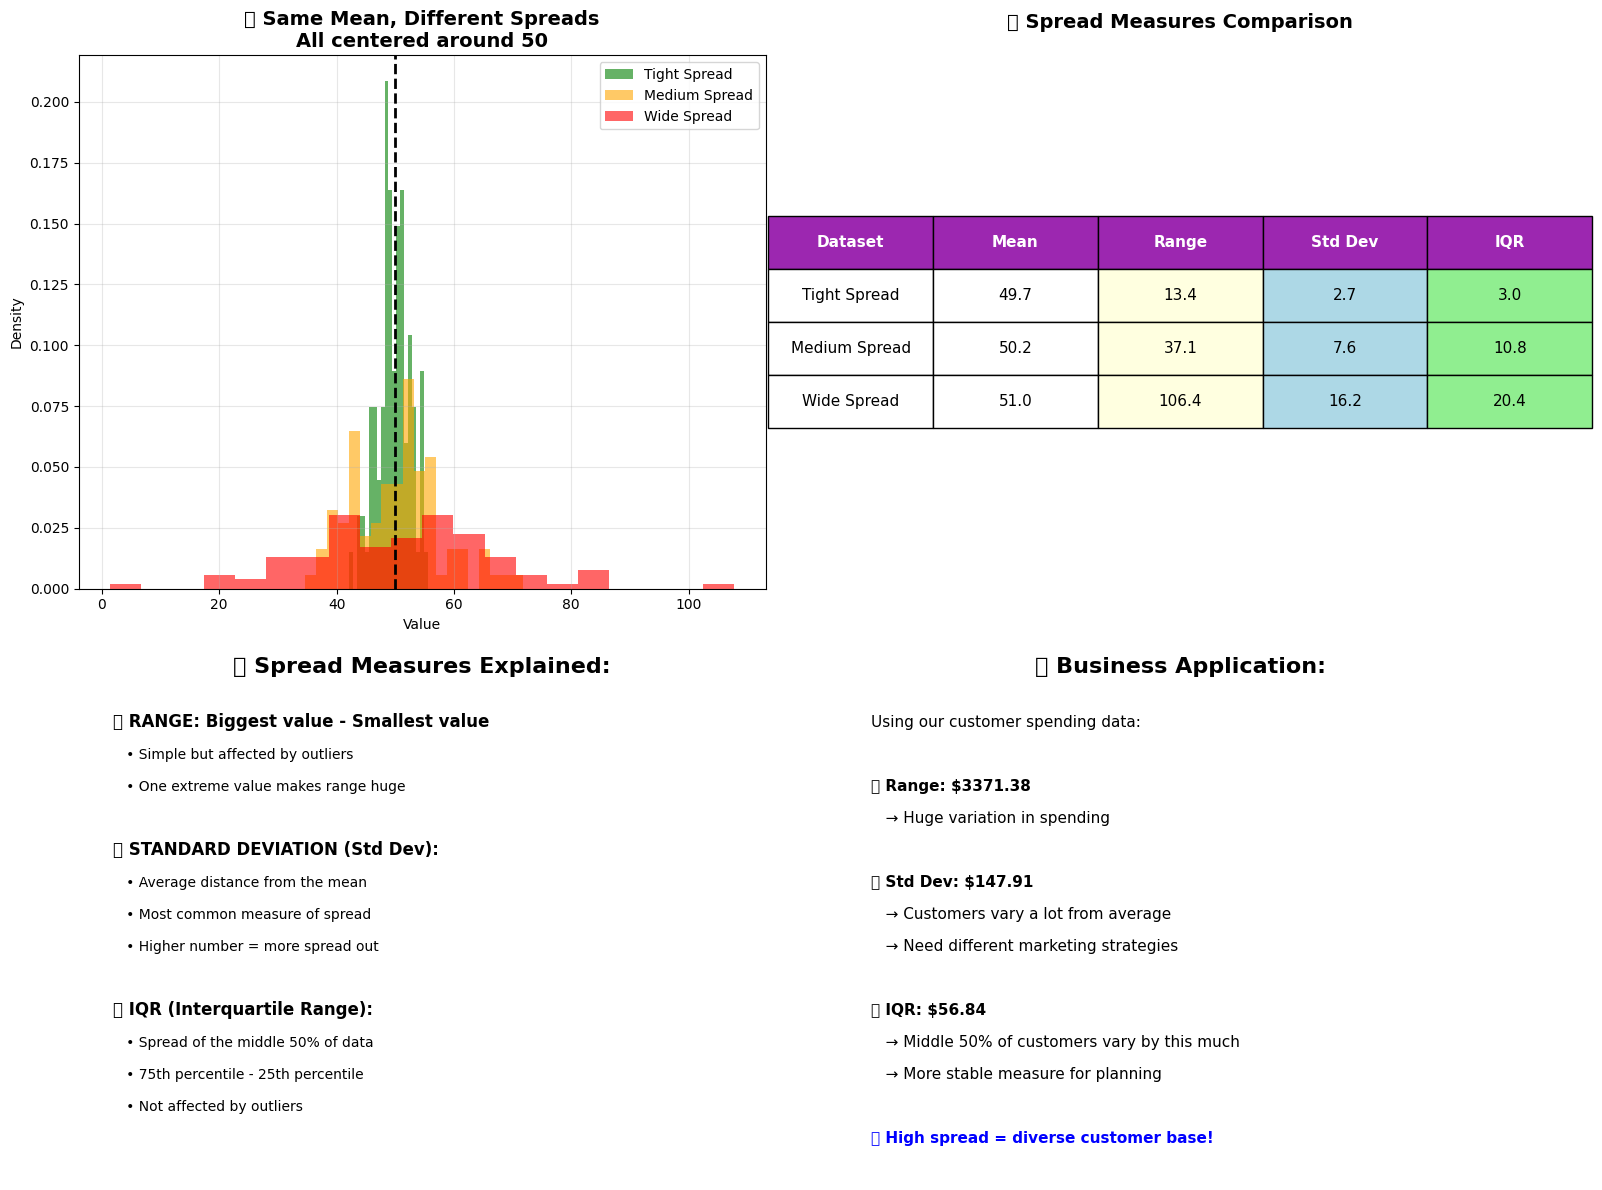


🎯 KEY TAKEAWAY:
Two datasets can have the same average but completely different spreads!
Always look at BOTH central tendency AND spread to understand your data.


In [4]:
def measures_of_spread_demo():
    """Demonstrate different measures of spread"""
    
    print("📏 MEASURES OF SPREAD - How Scattered Is Your Data?")
    print("=" * 55)
    
    # Create three datasets with same mean but different spreads
    np.random.seed(42)
    
    # All have mean ≈ 50, but different spreads
    tight_data = np.random.normal(50, 3, 100)    # Low spread
    medium_data = np.random.normal(50, 8, 100)   # Medium spread  
    wide_data = np.random.normal(50, 15, 100)    # High spread
    
    datasets = {
        'Tight Spread': tight_data,
        'Medium Spread': medium_data, 
        'Wide Spread': wide_data
    }
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # Show all three distributions
    colors = ['green', 'orange', 'red']
    
    for i, (name, data) in enumerate(datasets.items()):
        ax1.hist(data, bins=20, alpha=0.6, color=colors[i], label=name, density=True)
    
    ax1.set_xlabel('Value')
    ax1.set_ylabel('Density')
    ax1.set_title('📊 Same Mean, Different Spreads\nAll centered around 50', 
                 fontsize=14, weight='bold')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.axvline(50, color='black', linestyle='--', linewidth=2, label='Mean ≈ 50')
    
    # Calculate spread measures for each dataset
    spread_stats = []
    
    for name, data in datasets.items():
        spread_stats.append({
            'Dataset': name,
            'Mean': f'{np.mean(data):.1f}',
            'Range': f'{np.max(data) - np.min(data):.1f}',
            'Std Dev': f'{np.std(data):.1f}',
            'IQR': f'{np.percentile(data, 75) - np.percentile(data, 25):.1f}'
        })
    
    # Display spread statistics table
    df_spread = pd.DataFrame(spread_stats)
    
    ax2.axis('tight')
    ax2.axis('off')
    table = ax2.table(cellText=df_spread.values,
                     colLabels=df_spread.columns,
                     cellLoc='center',
                     loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(11)
    table.scale(1.2, 2.5)
    
    # Color code the header and highlight spread measures
    for i in range(len(df_spread.columns)):
        table[(0, i)].set_facecolor('#9C27B0')
        table[(0, i)].set_text_props(weight='bold', color='white')
    
    # Highlight the spread columns
    for i in range(1, len(df_spread) + 1):
        table[(i, 2)].set_facecolor('lightyellow')  # Range
        table[(i, 3)].set_facecolor('lightblue')   # Std Dev
        table[(i, 4)].set_facecolor('lightgreen')  # IQR
    
    ax2.set_title('📏 Spread Measures Comparison', fontsize=14, weight='bold', pad=20)
    
    # Explain each measure of spread
    ax3.axis('off')
    ax3.text(0.5, 0.95, "📚 Spread Measures Explained:", 
             ha='center', fontsize=16, weight='bold')
    
    explanations = [
        "📏 RANGE: Biggest value - Smallest value",
        "   • Simple but affected by outliers",
        "   • One extreme value makes range huge",
        "",
        "📊 STANDARD DEVIATION (Std Dev):",
        "   • Average distance from the mean",
        "   • Most common measure of spread", 
        "   • Higher number = more spread out",
        "",
        "📦 IQR (Interquartile Range):",
        "   • Spread of the middle 50% of data",
        "   • 75th percentile - 25th percentile",
        "   • Not affected by outliers"
    ]
    
    for i, text in enumerate(explanations):
        weight = 'bold' if text.startswith(('📏', '📊', '📦')) else 'normal'
        fontsize = 12 if text.startswith(('📏', '📊', '📦')) else 10
        ax3.text(0.05, 0.85 - i*0.06, text, fontsize=fontsize, weight=weight)
    
    # Real-world interpretation using customer data
    ax4.axis('off')
    ax4.text(0.5, 0.95, "💼 Business Application:", 
             ha='center', fontsize=16, weight='bold')
    
    # Use the customer spending data from previous example
    cust_range = np.max(customer_spending) - np.min(customer_spending)
    cust_std = np.std(customer_spending)
    cust_iqr = np.percentile(customer_spending, 75) - np.percentile(customer_spending, 25)
    
    business_insights = [
        "Using our customer spending data:",
        "",
        f"📏 Range: ${cust_range:.2f}",
        "   → Huge variation in spending",
        "",
        f"📊 Std Dev: ${cust_std:.2f}", 
        "   → Customers vary a lot from average",
        "   → Need different marketing strategies",
        "",
        f"📦 IQR: ${cust_iqr:.2f}",
        "   → Middle 50% of customers vary by this much",
        "   → More stable measure for planning",
        "",
        "💡 High spread = diverse customer base!"
    ]
    
    for i, text in enumerate(business_insights):
        weight = 'bold' if text.startswith(('📏', '📊', '📦', '💡')) else 'normal'
        color = 'blue' if text.startswith('💡') else 'black'
        ax4.text(0.05, 0.85 - i*0.06, text, fontsize=11, weight=weight, color=color)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n🎯 KEY TAKEAWAY:")
    print(f"Two datasets can have the same average but completely different spreads!")
    print(f"Always look at BOTH central tendency AND spread to understand your data.")

measures_of_spread_demo()

---
## 🎮 Interactive Example: Build Your Own Dataset

Let's experiment with creating datasets with different characteristics!

🎮 EXAMPLE 1: Symmetric data
🔍 ANALYZING YOUR DATASET
Data: [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
Number of values: 10


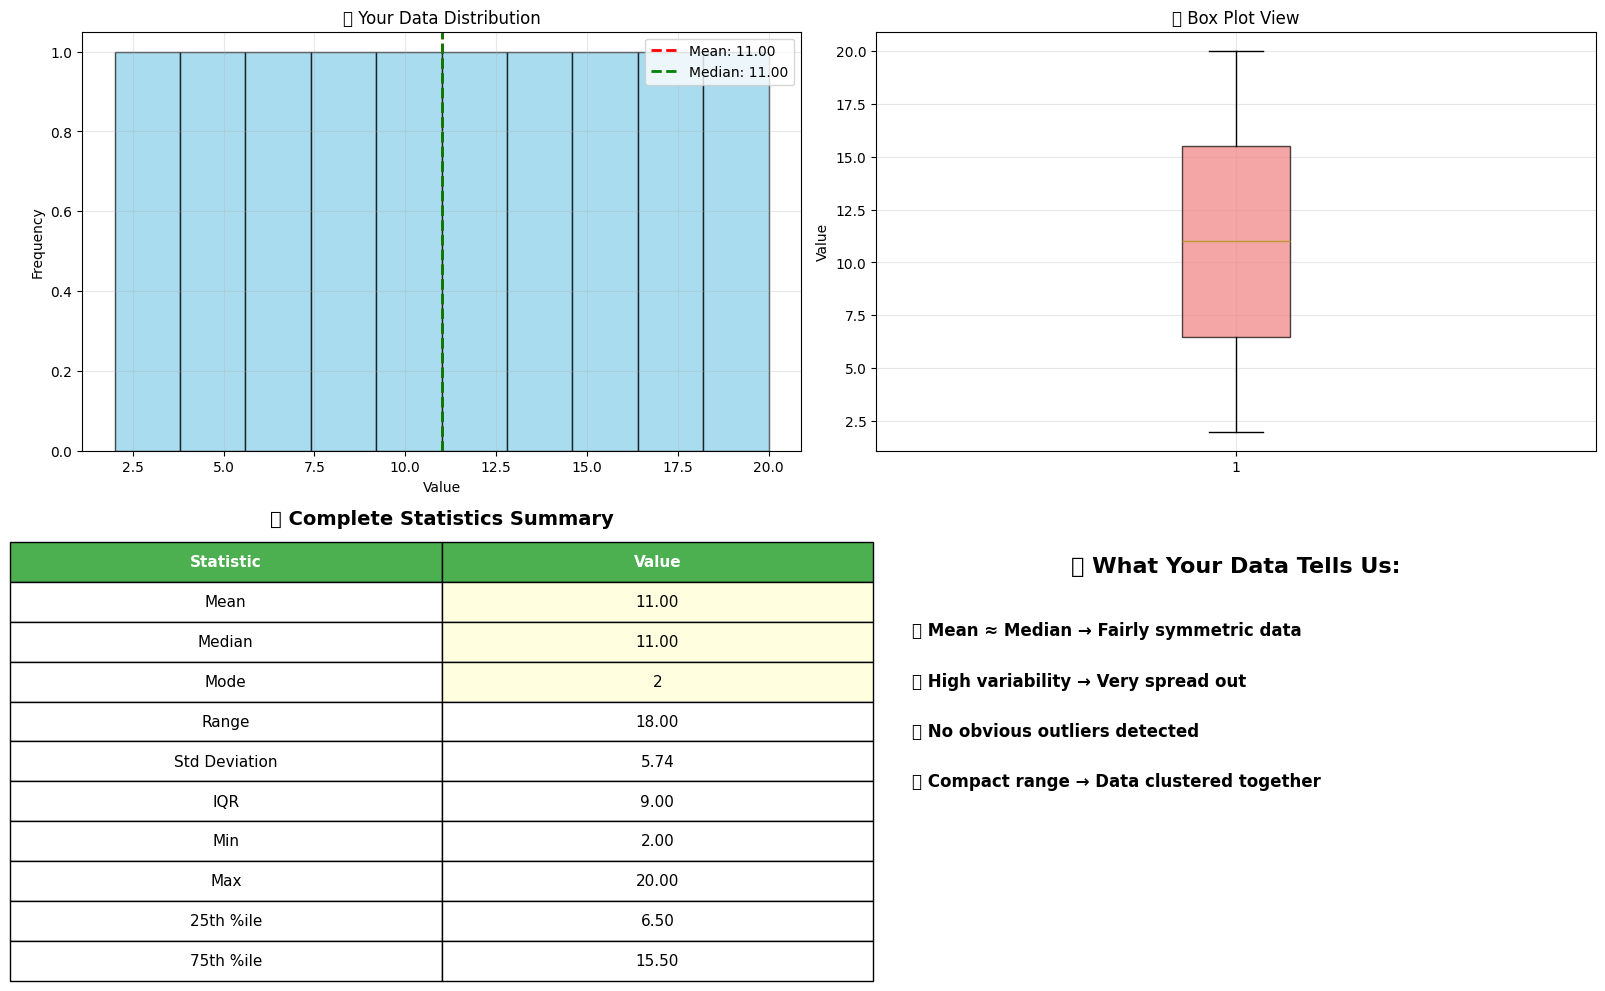


📈 SUMMARY:
Central Tendency: Mean=11.00, Median=11.00
Spread: Range=18.00, Std Dev=5.74

🎮 EXAMPLE 2: Data with outlier
🔍 ANALYZING YOUR DATASET
Data: [10, 12, 13, 14, 15, 16, 17, 18, 19, 100]
Number of values: 10


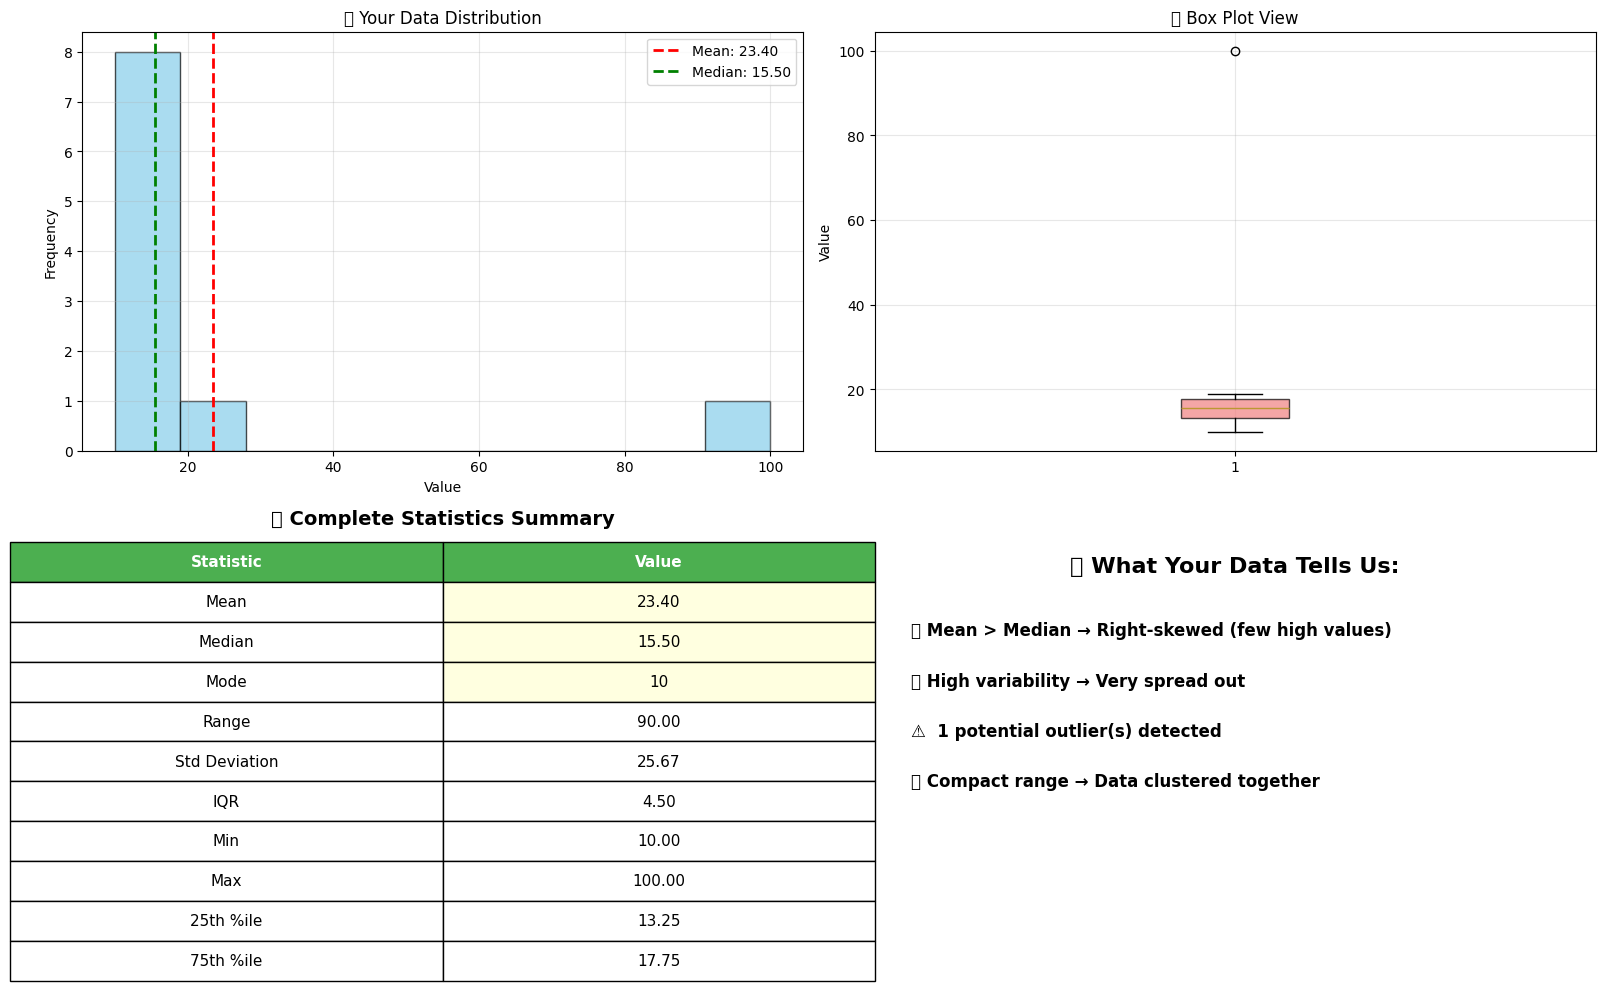


📈 SUMMARY:
Central Tendency: Mean=23.40, Median=15.50
Spread: Range=90.00, Std Dev=25.67
Outliers: [np.int64(100)]

🎮 TRY YOUR OWN DATA:
Change the numbers in the cell below and run it!


In [5]:
def interactive_dataset_builder(data_values):
    """
    Analyze any dataset and show all descriptive statistics
    
    Parameters:
    data_values: list of numbers to analyze
    """
    
    data = np.array(data_values)
    
    print(f"🔍 ANALYZING YOUR DATASET")
    print(f"=" * 35)
    print(f"Data: {data_values}")
    print(f"Number of values: {len(data)}")
    
    # Calculate all statistics
    mean_val = np.mean(data)
    median_val = np.median(data)
    try:
        mode_result = stats.mode(data, keepdims=True)
        mode_val = mode_result[0][0]
        mode_count = mode_result[1][0]
    except:
        mode_val = "No mode"
        mode_count = 0
    
    range_val = np.max(data) - np.min(data)
    std_val = np.std(data)
    q25 = np.percentile(data, 25)
    q75 = np.percentile(data, 75)
    iqr_val = q75 - q25
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))
    
    # Histogram
    ax1.hist(data, bins=min(10, len(np.unique(data))), alpha=0.7, 
             color='skyblue', edgecolor='black')
    ax1.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    ax1.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    ax1.set_xlabel('Value')
    ax1.set_ylabel('Frequency')
    ax1.set_title('📊 Your Data Distribution')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Box plot
    box_data = ax2.boxplot(data, vert=True, patch_artist=True)
    box_data['boxes'][0].set_facecolor('lightcoral')
    box_data['boxes'][0].set_alpha(0.7)
    ax2.set_ylabel('Value')
    ax2.set_title('📦 Box Plot View')
    ax2.grid(True, alpha=0.3)
    
    # Statistics summary
    stats_data = {
        'Statistic': ['Mean', 'Median', 'Mode', 'Range', 'Std Deviation', 'IQR',
                     'Min', 'Max', '25th %ile', '75th %ile'],
        'Value': [f'{mean_val:.2f}', f'{median_val:.2f}', 
                 f'{mode_val}' if mode_val != "No mode" else mode_val,
                 f'{range_val:.2f}', f'{std_val:.2f}', f'{iqr_val:.2f}',
                 f'{np.min(data):.2f}', f'{np.max(data):.2f}', 
                 f'{q25:.2f}', f'{q75:.2f}']
    }
    
    df_stats = pd.DataFrame(stats_data)
    
    ax3.axis('tight')
    ax3.axis('off')
    table = ax3.table(cellText=df_stats.values,
                     colLabels=df_stats.columns,
                     cellLoc='center',
                     loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(11)
    table.scale(1.2, 2)
    
    # Color code the table
    for i in range(len(df_stats.columns)):
        table[(0, i)].set_facecolor('#4CAF50')
        table[(0, i)].set_text_props(weight='bold', color='white')
    
    # Highlight central tendency measures
    for i in [1, 2, 3]:  # Mean, Median, Mode
        table[(i, 1)].set_facecolor('lightyellow')
    
    ax3.set_title('📋 Complete Statistics Summary', fontsize=14, weight='bold', pad=20)
    
    # Data insights
    ax4.axis('off')
    ax4.text(0.5, 0.95, "🧠 What Your Data Tells Us:", 
             ha='center', fontsize=16, weight='bold')
    
    insights = []
    
    # Compare mean and median
    if abs(mean_val - median_val) < 0.1:
        insights.append("📊 Mean ≈ Median → Fairly symmetric data")
    elif mean_val > median_val:
        insights.append("📈 Mean > Median → Right-skewed (few high values)")
    else:
        insights.append("📉 Mean < Median → Left-skewed (few low values)")
    
    # Assess spread
    cv = std_val / mean_val if mean_val != 0 else 0
    if cv < 0.1:
        insights.append("📏 Low variability → Values are consistent")
    elif cv < 0.3:
        insights.append("📏 Moderate variability → Some spread")
    else:
        insights.append("📏 High variability → Very spread out")
    
    # Check for outliers
    outlier_threshold = 1.5 * iqr_val
    outliers = data[(data < q25 - outlier_threshold) | (data > q75 + outlier_threshold)]
    if len(outliers) > 0:
        insights.append(f"⚠️  {len(outliers)} potential outlier(s) detected")
    else:
        insights.append("✅ No obvious outliers detected")
    
    # Range assessment
    if range_val == 0:
        insights.append("🎯 All values are identical")
    elif range_val < std_val * 4:
        insights.append("🎯 Compact range → Data clustered together")
    else:
        insights.append("🎯 Wide range → Data spread across large span")
    
    for i, insight in enumerate(insights):
        ax4.text(0.05, 0.8 - i*0.12, insight, fontsize=12, weight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n📈 SUMMARY:")
    print(f"Central Tendency: Mean={mean_val:.2f}, Median={median_val:.2f}")
    print(f"Spread: Range={range_val:.2f}, Std Dev={std_val:.2f}")
    if len(outliers) > 0:
        print(f"Outliers: {list(outliers)}")

# Try some example datasets
print("🎮 EXAMPLE 1: Symmetric data")
interactive_dataset_builder([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])

print("\n" + "="*60)
print("🎮 EXAMPLE 2: Data with outlier")
interactive_dataset_builder([10, 12, 13, 14, 15, 16, 17, 18, 19, 100])

print("\n" + "="*60)
print("🎮 TRY YOUR OWN DATA:")
print("Change the numbers in the cell below and run it!")

🔬 ANALYZING YOUR CUSTOM DATA:
🔍 ANALYZING YOUR DATASET
Data: [5, 7, 8, 8, 9, 10, 11, 12, 13, 15]
Number of values: 10


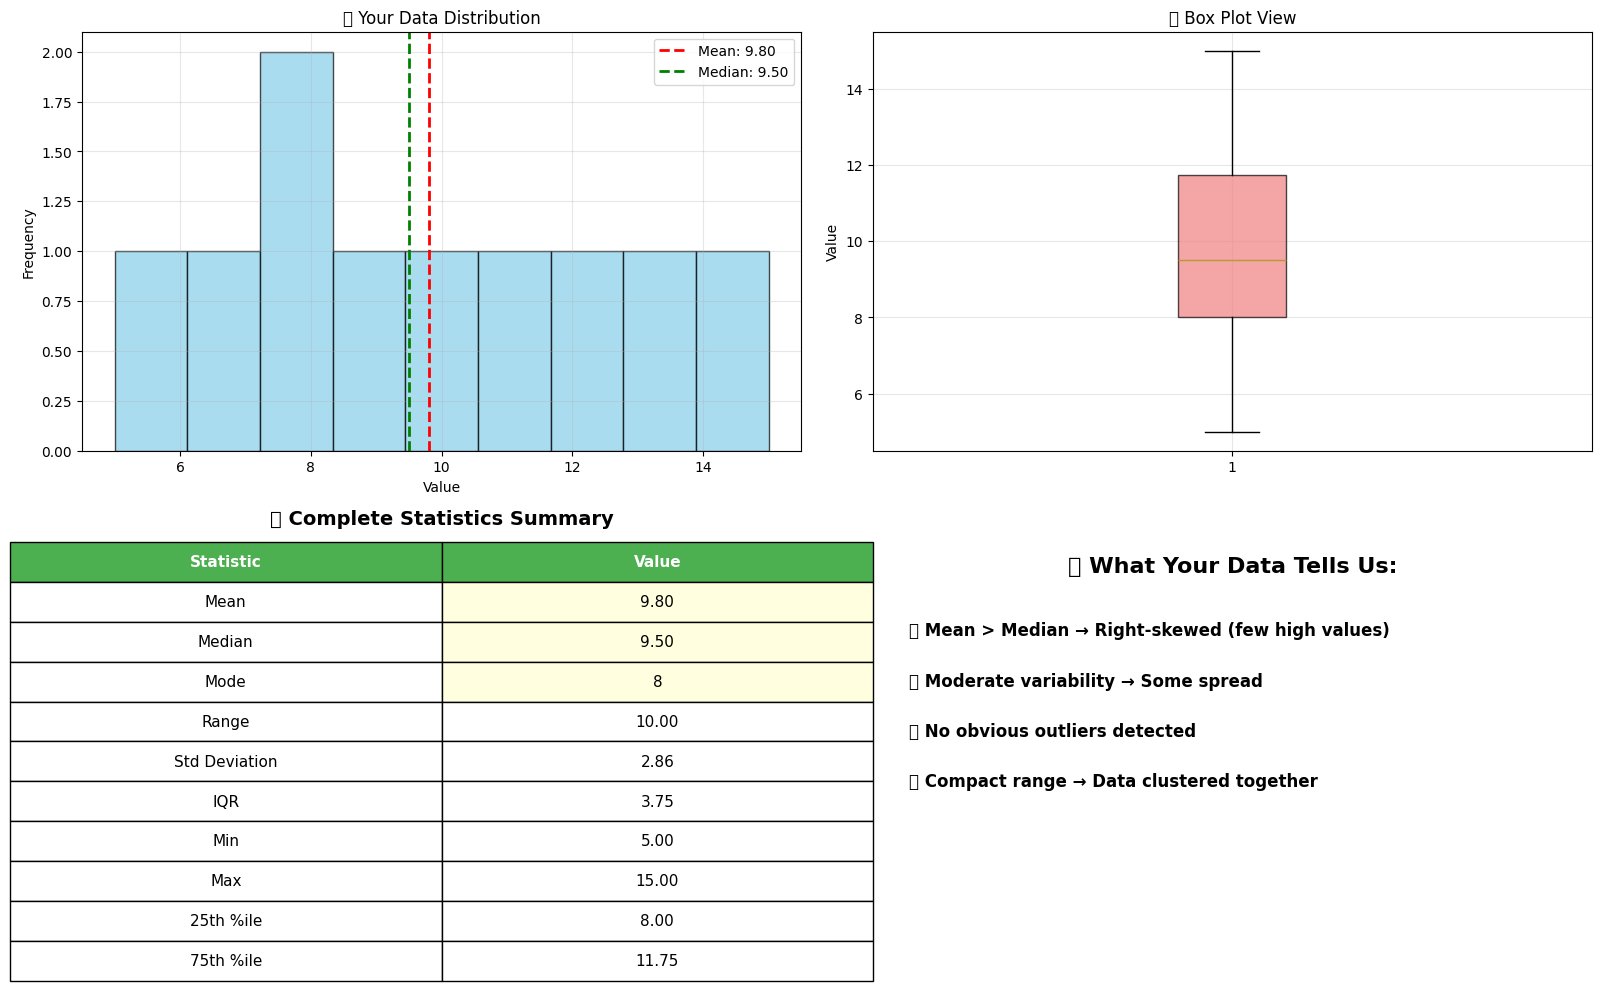


📈 SUMMARY:
Central Tendency: Mean=9.80, Median=9.50
Spread: Range=10.00, Std Dev=2.86


In [6]:
# 🎮 EXPERIMENT TIME!
# Replace the numbers below with your own data and run this cell:

my_data = [5, 7, 8, 8, 9, 10, 11, 12, 13, 15]

print("🔬 ANALYZING YOUR CUSTOM DATA:")
interactive_dataset_builder(my_data)

# Try these interesting examples by uncommenting them:

# Example 1: All the same
# interactive_dataset_builder([5, 5, 5, 5, 5, 5, 5])

# Example 2: Bimodal (two peaks)
# interactive_dataset_builder([1, 2, 2, 3, 3, 10, 11, 11, 12, 12])

# Example 3: Extreme outlier
# interactive_dataset_builder([1, 2, 3, 4, 5, 6, 7, 8, 9, 1000])

---
## 🎯 Key Takeaways and Summary

In [7]:
def descriptive_stats_summary():
    """Summary of all descriptive statistics concepts"""
    
    print("🎓 DESCRIPTIVE STATISTICS: COMPLETE GUIDE")
    print("=" * 50)
    
    concepts = {
        "📊 Measures of Central Tendency (The 'Middle')": [
            "🔴 Mean (Average): Add all values ÷ count",
            "   • Sensitive to outliers",
            "   • Use when data is symmetric",
            "",
            "🟢 Median (Middle value): 50th percentile",
            "   • Resistant to outliers",
            "   • Better for skewed data",
            "",
            "🟠 Mode (Most common): Most frequent value",
            "   • Good for categorical data",
            "   • Can have multiple modes"
        ],
        "📏 Measures of Spread (How 'Scattered')": [
            "📐 Range: Max - Min",
            "   • Simple but affected by outliers",
            "",
            "📊 Standard Deviation: Average distance from mean",
            "   • Most common spread measure",
            "   • Higher = more spread out",
            "",
            "📦 IQR: 75th percentile - 25th percentile",
            "   • Spread of middle 50%",
            "   • Resistant to outliers"
        ],
        "💼 Business Applications": [
            "🎯 Customer Segmentation: Use percentiles",
            "💰 Pricing Strategy: Consider median customer",
            "📈 Performance Metrics: Compare mean vs median",
            "⚠️  Risk Assessment: Look at spread measures",
            "🔍 Outlier Detection: Identify unusual patterns"
        ],
        "🚨 Common Mistakes to Avoid": [
            "❌ Using only mean when data is skewed",
            "❌ Ignoring outliers completely",
            "❌ Reporting statistics without context",
            "❌ Comparing spreads without considering scale",
            "✅ Always visualize your data first!"
        ]
    }
    
    for section, points in concepts.items():
        print(f"\n{section}:")
        for point in points:
            if point:  # Skip empty strings
                print(f"  {point}")
    
    print(f"\n🏆 PRACTICAL WISDOM:")
    wisdom = [
        "📊 Always report multiple measures, not just one",
        "👀 Visualize first, calculate second", 
        "🎯 Choose measures based on your data's shape",
        "💼 Think about business implications",
        "🔄 Update statistics as new data arrives"
    ]
    
    for tip in wisdom:
        print(f"  {tip}")
    
    print(f"\n🚀 NEXT STEPS:")
    print(f"  1. Practice with your own datasets")
    print(f"  2. Always ask: 'What story do these numbers tell?'")
    print(f"  3. Consider your audience when presenting statistics")
    print(f"  4. Remember: Statistics summarize, but visualization reveals!")

descriptive_stats_summary()

🎓 DESCRIPTIVE STATISTICS: COMPLETE GUIDE

📊 Measures of Central Tendency (The 'Middle'):
  🔴 Mean (Average): Add all values ÷ count
     • Sensitive to outliers
     • Use when data is symmetric
  🟢 Median (Middle value): 50th percentile
     • Resistant to outliers
     • Better for skewed data
  🟠 Mode (Most common): Most frequent value
     • Good for categorical data
     • Can have multiple modes

📏 Measures of Spread (How 'Scattered'):
  📐 Range: Max - Min
     • Simple but affected by outliers
  📊 Standard Deviation: Average distance from mean
     • Most common spread measure
     • Higher = more spread out
  📦 IQR: 75th percentile - 25th percentile
     • Spread of middle 50%
     • Resistant to outliers

💼 Business Applications:
  🎯 Customer Segmentation: Use percentiles
  💰 Pricing Strategy: Consider median customer
  📈 Performance Metrics: Compare mean vs median
  ⚠️  Risk Assessment: Look at spread measures
  🔍 Outlier Detection: Identify unusual patterns

🚨 Common Mistake

---
## 🎮 Practice Exercises

Test your understanding with these exercises:

### 📚 **Exercise 1: Salary Analysis**
A company has these annual salaries (in thousands): 
`[45, 48, 52, 55, 58, 62, 65, 68, 72, 150]`

1. Calculate mean and median
2. Which better represents "typical" salary? Why?
3. What does the large difference tell you?

### 📈 **Exercise 2: Store Performance**
Two stores have the same average daily sales ($1,000), but:
- Store A: Standard deviation = $50
- Store B: Standard deviation = $300

Which store is more predictable? Why does this matter for business planning?

### 🎯 **Exercise 3: Create Your Own**
1. Think of a dataset from your field/interests
2. Use the interactive tool above to analyze it
3. What insights can you draw?
4. How would you present this to different audiences?

### 💡 **Challenge: The Misleading Average**
Create a dataset where the mean is very misleading. What makes it misleading? How would you communicate the truth about this data?

---
*Remember: Descriptive statistics are your first step in understanding any dataset. They're like getting to know a new friend - you want to understand their personality (central tendency) and how predictable they are (spread)!* 😊